In [33]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle, islice
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances

import matplotlib.colors as mcols
from sklearn.decomposition import PCA
import inflect
import plotly.express as px
from sklearn.mixture import GaussianMixture
from factor_analyzer import FactorAnalyzer


from matplotlib.ticker import MaxNLocator

from multiprocessing import Pool

import hdbscan
import re
import os
import glob
import pickle


from minisom import MiniSom
import somoclu

In [2]:
os.chdir('/Landmark1/phase2_storage_sfml/')
with open('normalizedDict.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [3]:
nonNa_df = b['minmax_scaler'].dropna()
nonNa_df_expertBased = nonNa_df.drop(['ThinBind','PhsResp','RelAmpChng','Azm','Dip','InsFreq','CosPhs'], axis=1)

clusterDf_expertBased = nonNa_df_expertBased.T
clusterDf = nonNa_df.T

In [41]:
pca = PCA(n_components = 15)
principalComponents = pca.fit_transform(clusterDf)

features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)
PCA_components.index = nonNa_df.columns

Text(0, 0.5, 'Explained Variance')

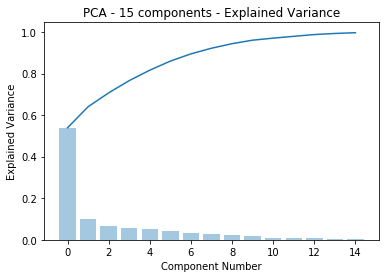

In [32]:
plt.bar(range(0,15),pca.explained_variance_ratio_, alpha = .4)
plt.plot(range(0,15),np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - 15 components - Explained Variance')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')

In [35]:
gmm = GaussianMixture(n_components=5).fit(PCA_components)
labels = gmm.predict(PCA_components)
PCA_components['cluster'] = labels

In [37]:
PCA_components['cluster'].sort_values()

AMP           0
RefStr        0
RelAmpChng    1
InsFreq       1
Azm           1
AppPol        1
PhsResp       1
InsPhs        1
CosPhs        2
DiscDip       3
Dip           3
InsBand       3
Disc          3
RespFreq      4
RMSFreq       4
AvgFreq       4
QFact         4
R3            4
ThinBind      4
Name: cluster, dtype: int64

In [61]:
df = nonNa_df

In [62]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(11583311.023672856, 0.0)

In [63]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

/home/data_science/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



0.6097076954221576


In [66]:
fa = FactorAnalyzer()
fa.fit(df)
ev, vectors = fa.get_eigenvalues()

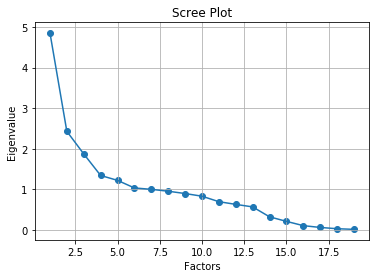

In [67]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [86]:
fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_
varDf = pd.DataFrame(loadings)
varDf.index = PCA_components.index

In [87]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2')
varDf.to_csv('factorAnalysis.csv')

In [88]:
fa.get_factor_variance()

(array([2.51754827, 2.42466831, 2.28973254, 2.01443543]),
 array([0.13250254, 0.12761412, 0.12051224, 0.10602292]),
 array([0.13250254, 0.26011666, 0.3806289 , 0.48665182]))